Trial 2 :- NO  Normalization of dataset, 8 Convolutional Layers with all Different HyperParameters and without Pooling in last 4 layers.
 Activitation Function - Relu, Optimizer - Adam, Loss function - mean_squared_error.  
 Batch Size = 500, Epochs = 12. Time Taken for Whole execution is approximately around 20 to 22 minutes
 
 Also the detailed logging of the training process is Shown Below (Without Progress Bar): 
Epoch 1/12
120/120 - 116s - loss: 0.0292 - accuracy: 0.7734 - val_loss: 0.0052 - val_accuracy: 0.9660 - 116s/epoch - 967ms/step
Epoch 2/12
120/120 - 111s - loss: 0.0047 - accuracy: 0.9697 - val_loss: 0.0042 - val_accuracy: 0.9726 - 111s/epoch - 928ms/step
Epoch 3/12
120/120 - 114s - loss: 0.0034 - accuracy: 0.9784 - val_loss: 0.0031 - val_accuracy: 0.9797 - 114s/epoch - 947ms/step
Epoch 4/12
120/120 - 111s - loss: 0.0025 - accuracy: 0.9842 - val_loss: 0.0022 - val_accuracy: 0.9859 - 111s/epoch - 921ms/step
Epoch 5/12
120/120 - 113s - loss: 0.0022 - accuracy: 0.9859 - val_l

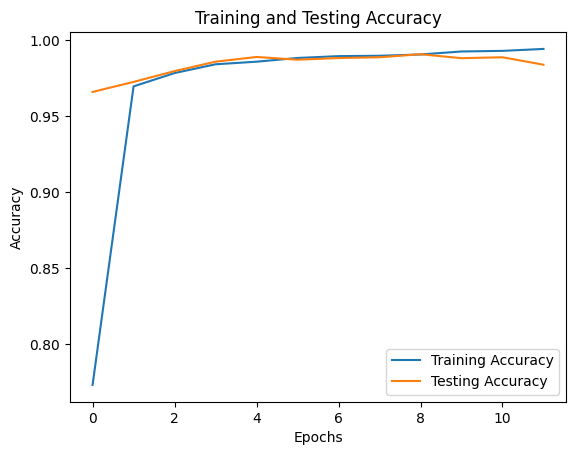

In [1]:
print("Trial 2 :- NO  Normalization of dataset, 8 Convolutional Layers with all Different HyperParameters and without Pooling in last 4 layers.\n Activitation Function - Relu, Optimizer - Adam, Loss function - mean_squared_error.  \n Batch Size = 500, Epochs = 12. Time Taken for Whole execution is approximately around 20 to 25 minutes\n \n Also the detailed logging of the training process is Shown Below (Without Progress Bar): ")

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to load and preprocess the data
def load_mnist_data(train_path, test_path):
    # Load the data
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Separate features and labels
    train_labels = train_df.iloc[:, 0].values
    train_image_pixcels = train_df.iloc[:, 1:].values
    test_labels = test_df.iloc[:, 0].values
    test_image_pixcels = test_df.iloc[:, 1:].values

    # Reshape images to (28, 28, 1)
    train_image_pixcels = train_image_pixcels.reshape(-1, 28, 28, 1)
    test_image_pixcels = test_image_pixcels.reshape(-1, 28, 28, 1)

    # Convert labels to one-hot encoded vectors
    train_labels = utils.to_categorical(train_labels, 10)
    test_labels = utils.to_categorical(test_labels, 10)

    return (train_image_pixcels, train_labels), (test_image_pixcels, test_labels)

# Load the MNIST data from local CSV files
train_path = '/content/drive/MyDrive/mnist_train.csv'
test_path = '/content/drive/MyDrive/mnist_test.csv'
(train_image_pixcels, train_labels), (test_image_pixcels, test_labels) = load_mnist_data(train_path, test_path)

#-------------------CNN Architecture-------------------
# Define the CNN model
model = models.Sequential()

#Random Selection of the Parameters

# First Convolutional Layer
model.add(layers.Conv2D(30, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='same'))#The input_shape=(28, 28, 1) parameter specifies the shape of the input data, where each image is 28x28 pixels with a single channel (grayscale) this is the input layer of the neural network.
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Pooling Layer

# Second Convolutional Layer
model.add(layers.Conv2D(40, (4, 4), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Pooling Layer

# Third Convolutional Layer
model.add(layers.Conv2D(50, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Pooling Layer

# Fourth Convolutional Layer
model.add(layers.Conv2D(60, (6, 6), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Pooling Layer

# No more pooling layers
# Fifth Convolutional Layer
model.add(layers.Conv2D(70, (2, 2), activation='relu', padding='same'))
# No pooling layer here to avoid negative dimensions

# Sixth Convolutional Layer
model.add(layers.Conv2D(80, (3, 3), activation='relu', padding='same'))
# No pooling layer here to avoid negative dimensions

# Seventh Convolutional Layer
model.add(layers.Conv2D(90, (3, 3), activation='relu', padding='same'))
# No pooling layer here to avoid negative dimensions

# Eighth Convolutional Layer
model.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
# No pooling layer here to avoid negative dimensions

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(200, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))


# Compile the model with Mean Squared Error (MSE) as the loss function
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_image_pixcels, train_labels, epochs=12, #epochs parameter specifies how many times the training process will iterate over the entire training dataset.
                    validation_data=(test_image_pixcels, test_labels),
                    verbose=2, batch_size=500)#If not specified, it uses a default batch size of 32 and verbose - gives training Data logging if not mentioned takes default as 1

# Print the final training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'\nTraining accuracy: {train_accuracy}')

# Predict classes for test set
test_predictions = model.predict(test_image_pixcels)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

#-------------------Evalution Parameters-------------------

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_predictions_classes)
# Print confusion matrix
print("\n Confusion Matrix:")
print(conf_matrix)

# overall accuracy
accuracy = accuracy_score(test_true_classes, test_predictions_classes)
print("\n Accuracy:", accuracy)

# Precession for each class
precision = precision_score(test_true_classes, test_predictions_classes, average=None)
print("\n Precision for each class:")
print(precision)

# Macroaverage precision
macro_precision = precision_score(test_true_classes, test_predictions_classes, average='macro')
print("\n Macroaverage Precision:", macro_precision)


# Recall for each class
recall = recall_score(test_true_classes, test_predictions_classes, average=None)
print("\n Recall for each class:")
print(recall)

# Macroaverage recall
macro_recall = recall_score(test_true_classes, test_predictions_classes, average='macro')
print("\n Macroaverage Recall:", macro_recall)


# F1 score for each class
f1 = f1_score(test_true_classes, test_predictions_classes, average=None)
print("\n F1 score for each class:")
print(f1)


# Macroaverage F1 score
macro_f1 = f1_score(test_true_classes, test_predictions_classes, average='macro')
print("\n Macroaverage F1 Score:", macro_f1,"\n")

# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()
